In [6]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

Load "digits" datasets from SKlearn and print the dimension of the dataset.  Apply PCA on the dataset and select first three components. Print the dimension of modified dataset and visualise the data using appropriate plotting tool/s. 

64 dimensions in unmodified data
3 dimensions in modified data


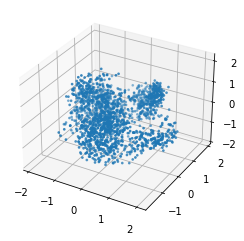

In [10]:
digits = datasets.load_digits()
df = pd.DataFrame(digits['data'])
df.fillna(value=df.mean(axis=0), axis=0, inplace=True)

scaler = MinMaxScaler()
dataNorm = scaler.fit_transform(df.to_numpy())

pca = PCA(n_components=3)

pca.fit(dataNorm)
pcaData = pca.transform(dataNorm)

x = pcaData[:,0]
y = pcaData[:,1]
z = pcaData[:,2]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(x, y, z, s=3)

print(str(df.shape[1]) + " dimensions in unmodified data")
print(str(pcaData.shape[1]) + " dimensions in modified data")

Classify the digit classes available in the dataset (use the modified dataset) using SVM with RBF kernel. Select appropriate data splitting approach and performance metrics.  Report the performances and the used model hyper-parameters.  

C:\Users\Tom.S\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:352: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  **scatter_kwargs


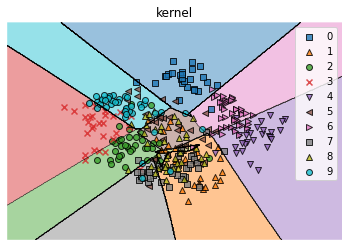

Training accuracy: 0.5963813500347948
Testing accuracy : 0.5805555555555556


In [14]:
pca = PCA(n_components=2)

pca.fit(dataNorm)
pcaData = pca.transform(dataNorm)

xTrain, xTest, yTrain, yTest = train_test_split(pcaData, digits['target'], test_size=.2, random_state=0)
svcRbf = SVC(gamma=.01, C=1)
svcRbf.fit(xTrain, yTrain)

plot_decision_regions(xTest, yTest, clf=svcRbf, legend=1)
plt.title('kernel')
plt.legend(ncol=1)
plt.axis("off")
plt.show()

print("Training accuracy: {}".format(metrics.accuracy_score(yTrain, svcRbf.predict(xTrain))))
print("Testing accuracy : {}".format(metrics.accuracy_score(yTest, svcRbf.predict(xTest))))